In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

# sử dụng data trực tiếp từ thu viện sklearn

from sklearn.datasets import load_iris

iris = load_iris()
dir(iris) #dùng lệnh này để lấy tên các cột trong dataset



['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
# đưa dữ liệu và tên các cột tương ứng vào dataframe để dễ hình dung hơn
df = pd.DataFrame(iris.data, columns = iris.feature_names)

df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['Target'] = iris.target # bảng dữ liệu trên còn thiếu cột target (cột này gồm 3 loại -- Iris Setosa -- Iris Versicolour -- Iris Virginica)
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
84,5.4,3.0,4.5,1.5,1
97,6.2,2.9,4.3,1.3,1
19,5.1,3.8,1.5,0.3,0
30,4.8,3.1,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


In [4]:
x = df.drop(['Target'], axis = 'columns')
y= iris.target

In [5]:
# phân chia các tập train và test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

In [6]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier(max_depth = 2)
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [7]:
y_predict = model_tree.predict(x_test)
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1])

In [8]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1])

In [9]:
import seaborn as sns
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[21,  0,  0],
       [ 0, 29,  1],
       [ 0,  7, 17]])

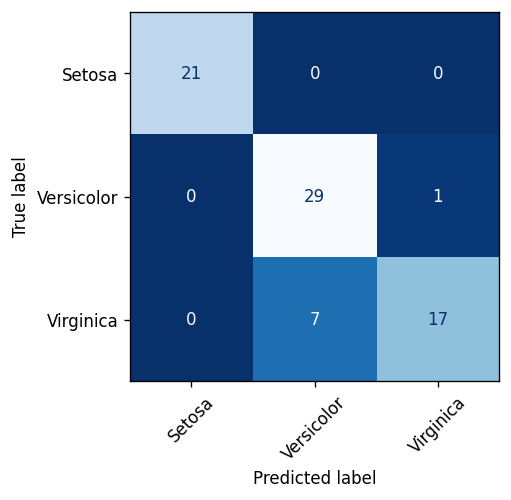

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize = (4,4))
labels = ['Setosa', 'Versicolor','Virginica']
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, ax = ax, display_labels = labels, colorbar = False, xticks_rotation = 45, cmap = 'Blues_r')

In [11]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_predict)
score

0.8933333333333333

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_predict_logic = model.predict(x_test)
y_predict


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1])

In [14]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predict_logic)
cnf_matrix

array([[21,  0,  0],
       [ 0, 29,  1],
       [ 0,  4, 20]])

In [15]:
accuracy_score(y_test, y_predict_logic)

0.9333333333333333

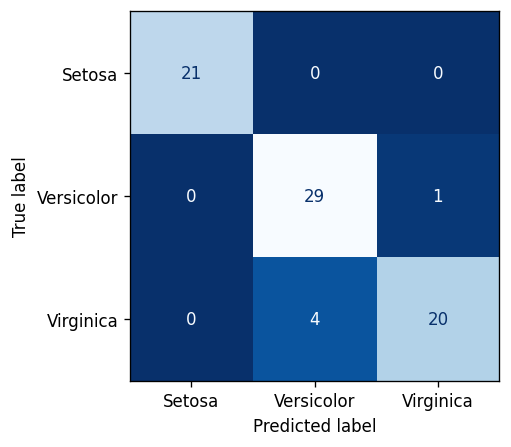

In [16]:
fig, ax = plt.subplots(figsize = (4,4))
labels = ['Setosa', 'Versicolor','Virginica']
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_logic, ax = ax, colorbar = False, display_labels = labels, cmap = 'Blues_r')

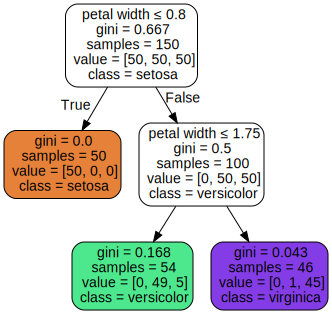

In [17]:
# ta vẽ lại cây quyết định
x, y = iris.data, iris.target
model = tree.DecisionTreeClassifier(max_depth = 2)
model = model.fit(x,y) # tính toán / fit model

import graphviz #Thư viện để hiển thị  sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)
dot_data = tree.export_graphviz(model, out_file = None, feature_names = ['sepal length','sepal width','petal length','petal width'],class_names=['setosa','versicolor','virginica'],filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [18]:
link='https://drive.google.com/file/d/1NZw2FidIkeCTdBLyp9jGC5FQ-0vCPc-b/view?usp=sharing'
# Nguồn data https://raw.githubusercontent.com/tiepvupsu/DecisionTreeID3/master/weather.csv
#Đọc data
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
data = pd.read_csv(path,encoding= 'unicode_escape')

#xây dựng mô hình quyết định có nên đi chơi hay không dựa vào data thời tiết

In [19]:
data.head(5)

,id,outlook,temperature,humidity,wind,play
0,1,sunny,hot,high,weak,no
1,2,sunny,hot,high,strong,no
2,3,overcast,hot,high,weak,yes
3,4,rainy,mild,high,weak,yes
4,5,rainy,cool,normal,weak,yes


In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder # thư viện mã hóa các string

data1 = data.apply(LabelEncoder().fit_transform) # mã hóa dữ liệu
data1.head(5)

,id,outlook,temperature,humidity,wind,play
0,0,2,1,0,1,0
1,1,2,1,0,0,0
2,2,0,1,0,1,1
3,3,1,2,0,1,1
4,4,1,0,1,1,1


In [21]:
# chia các tập train và test

x = data1.iloc[:, 1:-1].values
y = data1['play'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

In [22]:
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
y_predict_tree = model_tree.predict(x_test)
y_predict_tree

array([0, 1, 0, 1, 1, 1, 1])

In [24]:
y_test

array([1, 1, 1, 1, 1, 0, 1])

In [25]:
accuracy_score(y_test, y_predict_tree)

0.5714285714285714

In [26]:
model_tree.score(x_test, y_test)

0.5714285714285714

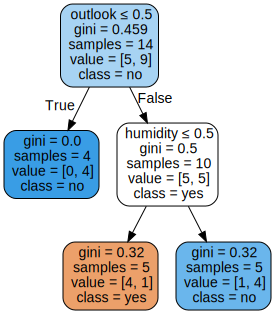

In [27]:
model_tree = tree.DecisionTreeClassifier(max_depth = 2)
model_tree = model_tree.fit(x, y)
dot_data = tree.export_graphviz(model_tree, out_file=None,feature_names=["outlook","temperature","humidity","wind"],class_names=["yes","no"],filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [28]:
y_probabilities = model_tree.predict_proba(x_test)
y_probabilities

array([[0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.2, 0.8]])

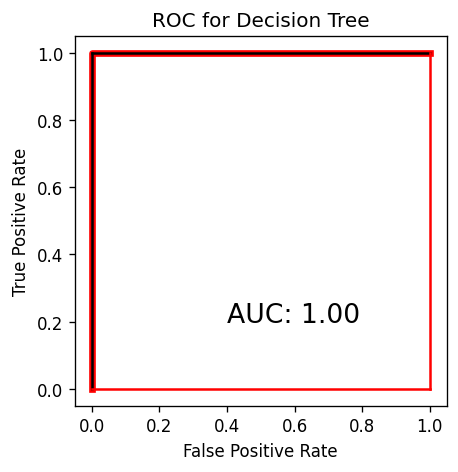

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve

y_probabilities = model_tree.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities)
plt.figure(figsize = (4,4))
plt.title('ROC for Decision Tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color = 'red')
plt.plot([0,0], [1,0], c = '0')
plt.plot([1,1], c='0')
plt.plot([0,0], c ='r')
plt.plot([1,1],[1,0], c='r')
plt.text(0.4, 0.2, 'AUC: {:.2f}'.format(roc_auc_score(y_test, y_probabilities)), size = 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [32]:
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)
y_predictLR = model_LR.predict(x_test)
y_predictLR

array([0, 0, 0, 1, 1, 1, 1])

In [33]:
accuracy_score(y_test, y_predictLR)

0.42857142857142855

PHÂN LOẠI VỚI RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier

score_total = []
for i in range(2,20,1):
  model_rf = RandomForestClassifier(n_estimators=i, random_state=1, max_samples=0.7)
  model_rf.fit(x_train, y_train)
  score = model_rf.score(x_test, y_test)
  score_total.append([score])

In [48]:
score_total

[[0.2857142857142857],
 [0.42857142857142855],
 [0.42857142857142855],
 [0.5714285714285714],
 [0.5714285714285714],
 [0.5714285714285714],
 [0.42857142857142855],
 [0.5714285714285714],
 [0.42857142857142855],
 [0.5714285714285714],
 [0.42857142857142855],
 [0.5714285714285714],
 [0.5714285714285714],
 [0.5714285714285714],
 [0.5714285714285714],
 [0.5714285714285714],
 [0.5714285714285714],
 [0.5714285714285714]]

In [40]:
model_rf = RandomForestClassifier(n_estimators = 3, random_state = 1, max_samples=0.7)
model_rf.fit(x_train, y_train)
score = model_rf.score(x_test, y_test)
score

0.42857142857142855

In [43]:
y_predictRF = model_rf.predict(x_test)
y_predictRF

array([0, 0, 0, 1, 1, 1, 1])

In [44]:
accuracy_score(y_test, y_predictRF)

0.42857142857142855

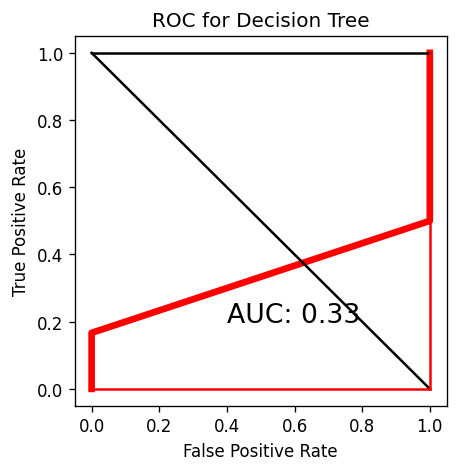

In [47]:
y_probabilities = model_rf.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities)
plt.figure(figsize = (4,4))
plt.title ('ROC for Decision Tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth = 4, color = 'red')
plt.plot([0,1],[1,0],color='0')
plt.plot([1,1], c = '0')
plt.plot([0,0], c ='r')
plt.plot([1,1],[1,0], c= 'r')
plt.text(0.4, 0.2, 'AUC: {:.2f}'.format(roc_auc_score(y_test, y_probabilities)), size = 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()